In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

from src.ingestion import download_from_drive, import_palette_json

In [5]:
# existing imports and functions
palette = import_palette_json("data/palette.json")

#TODO CMAP GENERICO 

# Profilo Finanziario (Vale)

In [6]:
df_profinanz = download_from_drive("csv_startup_profilo_finanziario")

In [7]:
df_profinanz.columns

Index(['Unnamed: 0', 'Ragione sociale', 'BvD ID number',
       'Ricavi delle vendite\nmigl EUR\nUltimo anno disp.',
       'Ricavi delle vendite\nmigl EUR\n2023',
       'Ricavi delle vendite\nmigl EUR\n2022',
       'Ricavi delle vendite\nmigl EUR\n2021',
       'EBITDA\nmigl EUR\nUltimo anno disp.', 'EBITDA\nmigl EUR\n2023',
       'EBITDA\nmigl EUR\n2022', 'EBITDA\nmigl EUR\n2021',
       'Utile Netto\nmigl EUR\nUltimo anno disp.',
       'Utile Netto\nmigl EUR\n2023', 'Utile Netto\nmigl EUR\n2022',
       'Utile Netto\nmigl EUR\n2021',
       'Totale Attività\nmigl EUR\nUltimo anno disp.',
       'Totale Attività\nmigl EUR\n2023', 'Totale Attività\nmigl EUR\n2022',
       'Totale Attività\nmigl EUR\n2021',
       'Patrimonio Netto\nmigl EUR\nUltimo anno disp.',
       'Patrimonio Netto\nmigl EUR\n2023', 'Patrimonio Netto\nmigl EUR\n2022',
       'Patrimonio Netto\nmigl EUR\n2021',
       'Posizione finanziaria netta\nmigl EUR\nUltimo anno disp.',
       'Posizione finanziaria nett

Redditività delle vendite (ROS): quanto di ogni euro di vendita rimane come guadagno, al netto dei costi e delle spese.



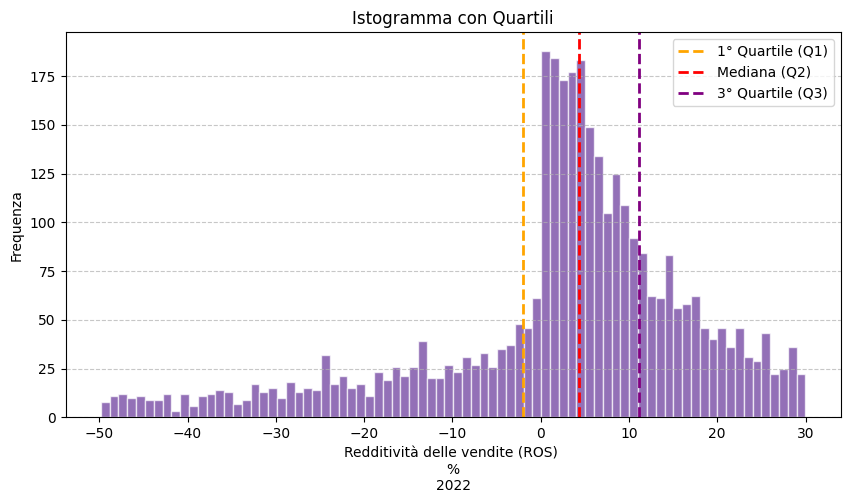

In [8]:

col_name = 'Redditività delle vendite (ROS) \n%\n2022'
bins = 80
data = df_profinanz[col_name]
#eliminare n.s e n.a
data = data.replace("n.s.", np.nan)
data = data.replace("n.d.", np.nan)
data = data.dropna()
#filtra valori numerici
data = data.astype(float)
q1, q2, q3 = np.percentile(data, [25, 50, 75])

# Creare l'istogramma
plt.figure(figsize=(10, 5))
plt.hist(data,
         bins=bins,
         color="rebeccapurple",
         edgecolor="white", alpha=0.7)

# Aggiungere linee per i quartili
plt.axvline(q1, color="orange", linestyle="dashed", linewidth=2, label="1° Quartile (Q1)")
plt.axvline(q2, color="red", linestyle="dashed", linewidth=2, label="Mediana (Q2)")
plt.axvline(q3, color="purple", linestyle="dashed", linewidth=2, label="3° Quartile (Q3)")

# Aggiungere etichette e titolo
plt.xlabel(col_name)
plt.ylabel("Frequenza")
plt.title("Istogramma con Quartili")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrare il grafico
plt.show()

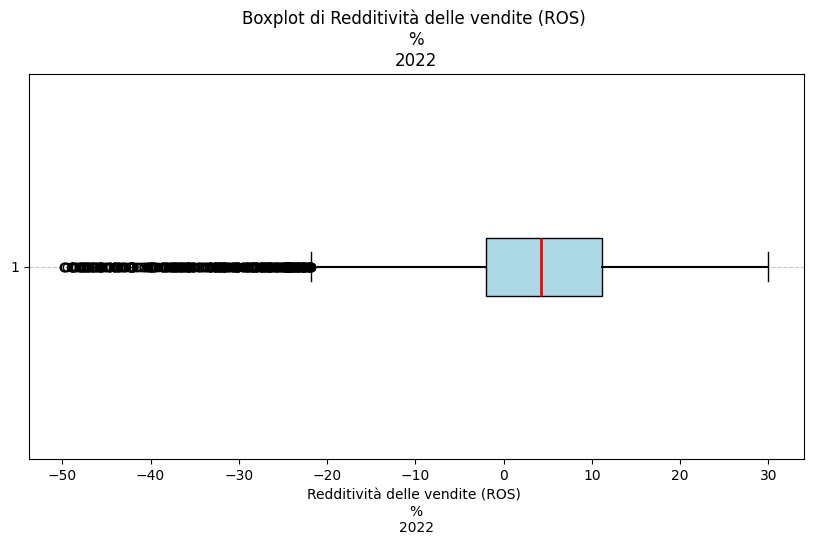

In [9]:
plt.figure(figsize=(10, 5))
plt.boxplot(data, vert=False, patch_artist=True, 
            boxprops=dict(facecolor="lightblue", color="black"),
            whiskerprops=dict(color="black", linewidth=1.5),
            medianprops=dict(color="red", linewidth=2))

plt.title(f"Boxplot di {col_name}")
plt.xlabel(col_name)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


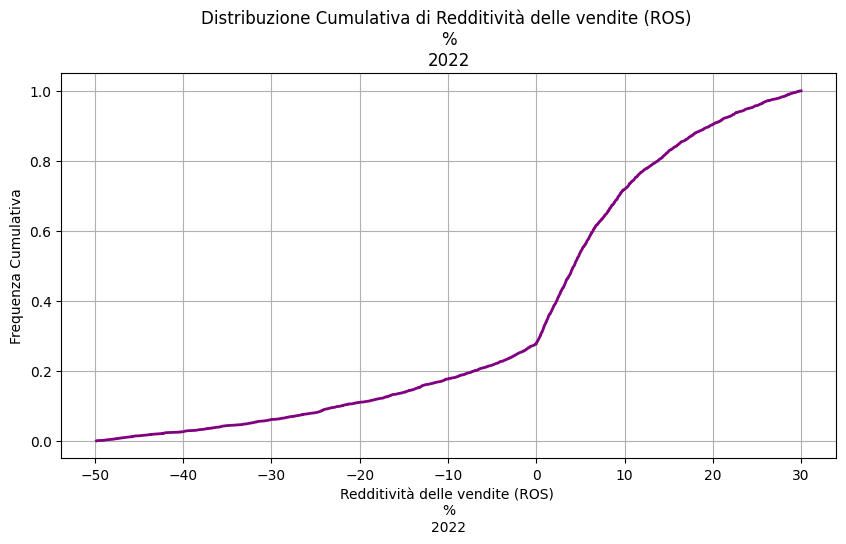

In [10]:
# Calcolare la distribuzione cumulativa
data_sorted = np.sort(data)
cumulative = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

# Creiamo il grafico
plt.figure(figsize=(10, 5))
plt.plot(data_sorted, cumulative, color="purple", lw=2)
plt.title(f"Distribuzione Cumulativa di {col_name}")
plt.xlabel(col_name)
plt.ylabel("Frequenza Cumulativa")
plt.grid(True)
plt.show()


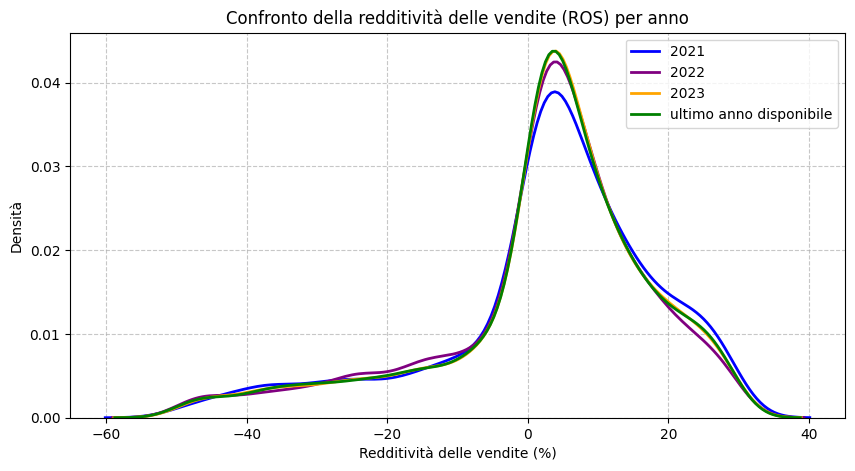

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Nomi delle colonne corrette
col_ros_2021 = 'Redditività delle vendite (ROS) \n%\n2021'
col_ros_2022 = 'Redditività delle vendite (ROS) \n%\n2022'
col_ros_2023 = 'Redditività delle vendite (ROS) \n%\n2023'
col_ros_ultimo = 'Redditività delle vendite (ROS) \n%\nUltimo anno disp.'

# Pulizia dei dati: rimuovere "n.s." e "n.d." e convertire in numerico
def clean_data(column):
    data = df_profinanz[column].replace(["n.s.", "n.d."], np.nan).dropna()
    return data.astype(float)

# Creiamo il dataset pulito per ogni anno
data_2021 = clean_data(col_ros_2021)
data_2022 = clean_data(col_ros_2022)
data_2023 = clean_data(col_ros_2023)
data_ultimo = clean_data(col_ros_ultimo)

# Creare il grafico a linee (KDE)
plt.figure(figsize=(10, 5))
sns.kdeplot(data_2021, label="2021", color="blue", linewidth=2)
sns.kdeplot(data_2022, label="2022", color="purple", linewidth=2)
sns.kdeplot(data_2023, label="2023", color="orange", linewidth=2)
sns.kdeplot(data_ultimo, label="ultimo anno disponibile", color="green", linewidth=2)

# Aggiungere titolo ed etichette
plt.title("Confronto della redditività delle vendite (ROS) per anno")
plt.xlabel("Redditività delle vendite (%)")
plt.ylabel("Densità")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)

# Mostrare il grafico
plt.show()


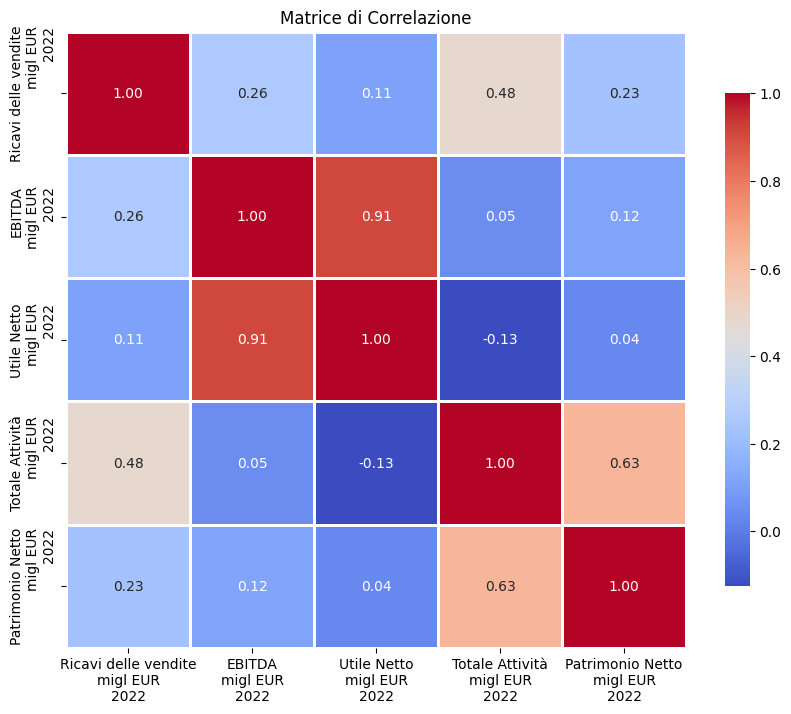

In [12]:
import seaborn as sns

numerical_cols = [
    'Ricavi delle vendite\nmigl EUR\n2022', 
    'EBITDA\nmigl EUR\n2022',
    'Utile Netto\nmigl EUR\n2022', 
    'Totale Attività\nmigl EUR\n2022',
    'Patrimonio Netto\nmigl EUR\n2022'
]

# Creiamo una matrice di correlazione
corr_matrix = df_profinanz[numerical_cols].apply(pd.to_numeric, errors='coerce').corr()

# Creiamo la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, cbar_kws={'shrink': 0.8})
plt.title("Matrice di Correlazione")
plt.show()


# Azionisti (Anna)

In [13]:
df_azionisti = download_from_drive("csv_azionisti")

# Startup Anagrafica (Lorenzo)

In [14]:
# Import & Cleaning

# Import dataframe
df_s_anagrafica = download_from_drive("csv_startup_anagrafica")

# Settare index su colonna Unamed: 0
df_s_anagrafica.set_index("Unnamed: 0", inplace=True)

# Rinominare colonna Unnamed: 0 in Index
df_s_anagrafica.index.name = "Index"

# Rinominare colonna ATECO 2007 codice in ATECO
df_s_anagrafica.rename(columns={"ATECO 2007\ncodice": "ATECO"}, inplace=True)

## Data Cleaning

# Remove rows where ATECO is empty or NaN
df_s_anagrafica.dropna(subset=['ATECO'], inplace=True)

# Remove column Fondazione (beacuse is empty)
df_s_anagrafica.drop(columns=['Fondazione'], inplace=True)

# Convert ATECO in integer
df_s_anagrafica['ATECO'] = df_s_anagrafica['ATECO'].astype(int)

# Convert the column where in the title there is "Codice Postale" in integer
df_s_anagrafica.loc[:, df_s_anagrafica.columns.str.contains('Codice postale')] = df_s_anagrafica.loc[:, df_s_anagrafica.columns.str.contains('Codice postale')].astype('Int64')

# Convert the index column to integer
df_s_anagrafica.index = df_s_anagrafica.index.astype(int)

# Convert column Partita IVA to see entirely
df_s_anagrafica["Partita IVA"] = df_s_anagrafica["Partita IVA"].apply(lambda x: '{:.0f}'.format(x))
df_s_anagrafica["Partita IVA"]

# if Sede operativa - Provincia is NaN, insert the value contained in Provincia
df_s_anagrafica['Sede operativa - Provincia'].fillna(df_s_anagrafica['Provincia'], inplace=True)

# if Sede operativa - Codice postale is NaN or <NA>, insert the value contained in Indirizzo sede legale - Codice postale
df_s_anagrafica['Sede operativa - Codice postale'].fillna(df_s_anagrafica['Indirizzo sede legale - Codice postale'], inplace=True)

# if Sede operativa - Regione - Regione is NaN, insert the value contained in Indirizzo sede legale - Regione
df_s_anagrafica['Sede operativa - Regione - Regione'].fillna(df_s_anagrafica['Indirizzo sede legale - Regione'], inplace=True)

/tmp/ipykernel_5980/3910890854.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[98066, 20121, 80122, 98051, 24125, 90135, 80143,  6012,  8011, 72017,
 ...
 15076, 15121, 15121, 92013, 92019, 92026, 92100,  <NA>, 92100, 92100]
Length: 11954, dtype: Int64' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_s_anagrafica.loc[:, df_s_anagrafica.columns.str.contains('Codice postale')] = df_s_anagrafica.loc[:, df_s_anagrafica.columns.str.contains('Codice postale')].astype('Int64')
/tmp/ipykernel_5980/3910890854.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[ <NA>, 20121, 80144,  <NA>,  <NA>, 90135, 80100,  <NA>,  8100, 72017,
 ...
  <NA>,  <NA>,  <NA>,  <NA>,  <NA>,  <NA>,  <NA>,  <NA>,  <NA>,  <NA>]
Length: 11954, dtype: Int64' has dtype incompatible with float64, pl

In [15]:
df_s_anagrafica.head()

,Ragione sociale,BvD ID number,Codice fiscale,Numero CCIAA,Partita IVA,Indirizzo sede legale,Provincia,Indirizzo sede legale - Codice postale,Indirizzo sede legale - Regione,Sede operativa,Sede operativa - Provincia,Sede operativa - Codice postale,Sede operativa - Regione - Regione,ATECO,Anno di costituzione,Stato giuridico,Forma giuridica
Index,,,,,,,,,,,,,,,,,
1,RAINSHOW S.R.L.,IT03595550835,3595550835,ME0248323,3595550835,"VIA FRANCESCO CRISPI, 4",Messina,98066,Sicilia,NaN,Messina,98066,Sicilia,711210,06/12/2019,Attiva,S.R.L.
2,CHECKSIG S.R.L. SOCIETA' BENEFIT,IT11028330964,11028330964,MI2573724,11028330964,"PZA DEL LIBERTY, 8",Milano,20121,Lombardia,PIAZZA DEL LIBERTY 8,Milano,20121,LOMBARDIA,620100,25/10/2019,Attiva,S.R.L.
3,OTOFARMA S.P.A.,IT08431301210,8431301210,NA0957454,8431301210,"VLE ANTONIO GRAMSCI, 17/B",Napoli,80122,Campania,VIA VIC S.M. DEL PIANTO TORRE 2,Napoli,80144,CAMPANIA,266002,13/07/2016,Attiva,S.P.A.
4,SIKELIA OIL S.R.L.,IT03577640836,3577640836,ME0247028,3577640836,"VIA STRETTO I COCCOMELLI, 64",Messina,98051,Sicilia,NaN,Messina,98051,Sicilia,473000,15/07/2019,Attiva,S.R.L.
5,POWER.IT S.R.L.,IT04355290166,4355290166,BG0456683,4355290166,"VIA ALESSANDRO NOLI, 13",Bergamo,24125,Lombardia,NaN,Bergamo,24125,Lombardia,352300,31/01/2019,Attiva,S.R.L.


In [16]:
df_s_anagrafica["Anno di costituzione"].value_counts()

Anno di costituzione
27/07/2023    25
05/02/2020    25
03/12/2020    24
06/05/2021    23
10/12/2020    22
              ..
18/07/2017     1
05/01/2024     1
02/02/2017     1
03/05/2018     1
28/02/2021     1
Name: count, Length: 1931, dtype: int64

## Foundation Year (Pre and Post 2019)

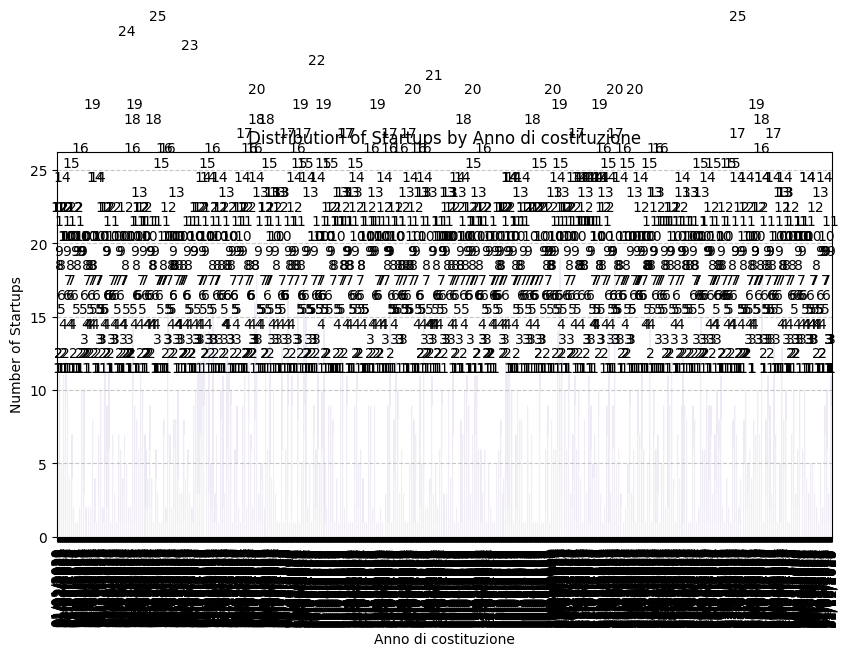

In [17]:
# Distribution of startups grouped by Anno di costituzione
anno_costituzione_counts = df_s_anagrafica["Anno di costituzione"].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(10, 5))
anno_costituzione_counts.plot(kind='bar', color="rebeccapurple", edgecolor="white", alpha=0.7)
for i in range(len(anno_costituzione_counts)):
    plt.text(i, anno_costituzione_counts.iloc[i] + 10, str(anno_costituzione_counts.iloc[i]), ha='center', va='bottom')
plt.xlabel("Anno di costituzione")
plt.ylabel("Number of Startups")
plt.title("Distribution of Startups by Anno di costituzione")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [18]:
# Creare df con startup costituite dal 2019 in avanti (facendo riferimento alle ultime 4 cifre dalla data di costituzione)
df_s_anagrafica["Anno di costituzione"] = df_s_anagrafica["Anno di costituzione"].apply(lambda x: int(str(x)[-4:]))
df_s_anagrafica_post2019 = df_s_anagrafica[df_s_anagrafica["Anno di costituzione"] >= 2019]

In [19]:
# Create df with startup founded before 2019
df_s_anagrafica["Anno di costituzione"] = df_s_anagrafica["Anno di costituzione"].apply(lambda x: int(str(x)[-4:]))
df_s_anagrafica_pre2019 = df_s_anagrafica[df_s_anagrafica["Anno di costituzione"] < 2019]

In [20]:
df_s_anagrafica_post2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11262 entries, 1 to 11967
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Ragione sociale                         11262 non-null  object
 1   BvD ID number                           11262 non-null  object
 2   Codice fiscale                          11262 non-null  int64 
 3   Numero CCIAA                            11262 non-null  object
 4   Partita IVA                             11262 non-null  object
 5   Indirizzo sede legale                   11262 non-null  object
 6   Provincia                               11250 non-null  object
 7   Indirizzo sede legale - Codice postale  11230 non-null  Int64 
 8   Indirizzo sede legale - Regione         11250 non-null  object
 9   Sede operativa                          1837 non-null   object
 10  Sede operativa - Provincia              11254 non-null  object
 11  Sede op

Si osserva che solo 1837 Startup indicano una sede operativa: sono le uniche che hanno sede operativa diversa da sede legale

In [21]:
# Create df with startup grouped by region
df_s_anagrafica_post2019["Indirizzo sede legale - Regione"].value_counts()

Indirizzo sede legale - Regione
Lombardia                       3263
Lazio                           1333
Campania                        1176
Emilia-Romagna                   863
Veneto                           709
Piemonte                         642
Puglia                           522
Toscana                          488
Sicilia                          444
Marche                           336
Liguria                          232
Trentino-Alto Adige/Südtirol     229
Friuli-Venezia Giulia            200
Abruzzo                          190
Calabria                         186
Umbria                           142
Sardegna                         139
Basilicata                        98
Molise                            45
Valle d'Aosta/Vallée d'Aoste      13
Name: count, dtype: int64

## Distribuzione Geografica

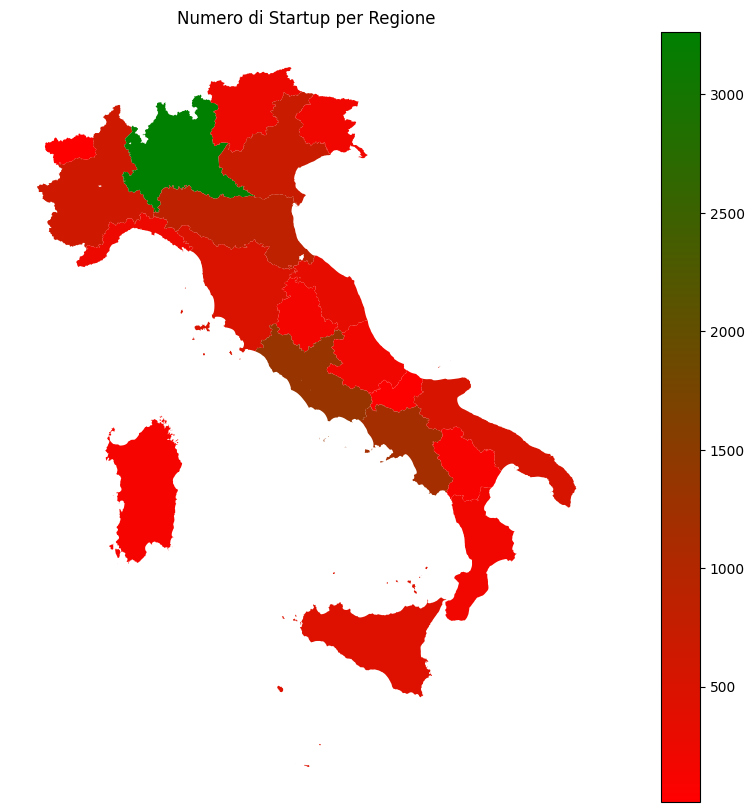

In [22]:
# Use Geopandas to create a map of italy with colour intensity based on the number of startups in each region
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import matplotlib.colors as mcolors

# Load the Italy map
italy = gpd.read_file("https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_regions.geojson")

# Create a DataFrame with the number of startups in each region
df_startup_per_region = df_s_anagrafica_post2019["Indirizzo sede legale - Regione"].value_counts().reset_index()
df_startup_per_region.columns = ["Regione", "Numero di Startup"]

# Merge the two DataFrames
italy = italy.merge(df_startup_per_region, left_on="reg_name", right_on="Regione")

# Plot the map

# Create a colormap from red to green
cmap = mcolors.LinearSegmentedColormap.from_list("RedGreen", [palette["color_failure"], palette["color_success"]])
#cmap = mcolors.ListedColormap([palette["color_failure"], palette["color_success"]])

italy.plot(column="Numero di Startup", legend=True, figsize=(15, 10), cmap=cmap)
plt.title("Numero di Startup per Regione")
plt.axis("off")
plt.show()


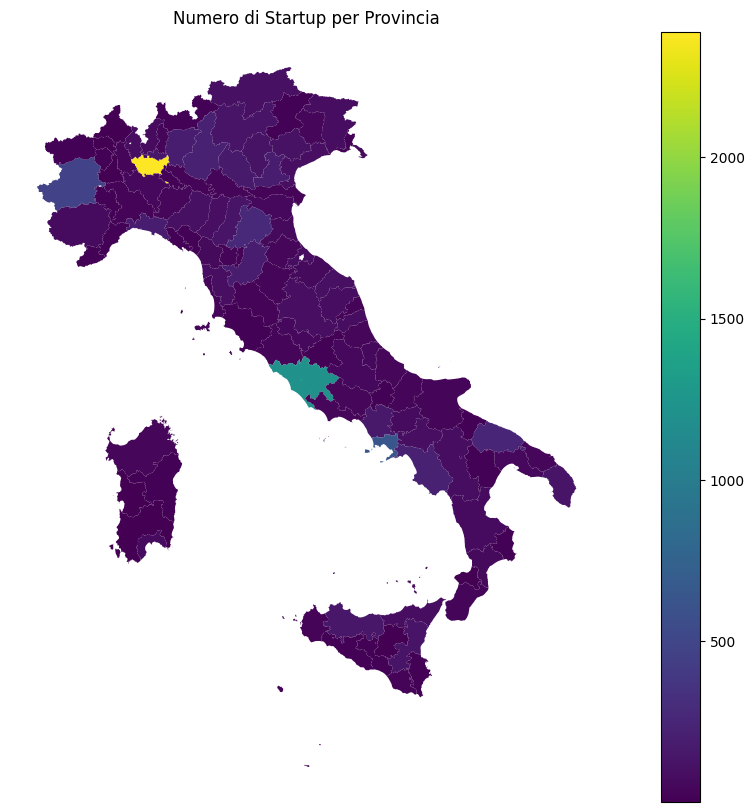

In [23]:
# Use Geopandas to create a map of italy with colour intensity based on the number of startups in each provincia
# Create a DataFrame with the number of startups in each provincia
df_startup_per_provincia = df_s_anagrafica_post2019["Provincia"].value_counts().reset_index()
df_startup_per_provincia.columns = ["Provincia", "Numero di Startup"]

# Load the Italy map with provinces
italy_provinces = gpd.read_file("https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_provinces.geojson")

# Merge the two DataFrames
italy_provinces = italy_provinces.merge(df_startup_per_provincia, left_on="prov_name", right_on="Provincia")

# Plot the map
italy_provinces.plot(column="Numero di Startup", legend=True, figsize=(15, 10))
plt.title("Numero di Startup per Provincia")
plt.axis("off")
plt.show()

## Distribuzione per codici ATECO

In [24]:
# Create df with startup grouped by ATECO
# Raggruppare in base alle prime n cifre del codice ATECO
n = 2
df_s_anagrafica_post2019[f"ATECO_{n}"] = df_s_anagrafica_post2019["ATECO"].apply(lambda x: str(x)[:n])
df_s_anagrafica_post2019[f"ATECO_{n}"].value_counts()
#df_s_anagrafica_post2019["ATECO"[::4]].value_counts()

/tmp/ipykernel_5980/134982787.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s_anagrafica_post2019[f"ATECO_{n}"] = df_s_anagrafica_post2019["ATECO"].apply(lambda x: str(x)[:n])


ATECO_2
62    5057
72    1653
63     851
70     325
74     288
      ... 
49       1
95       1
37       1
50       1
92       1
Name: count, Length: 72, dtype: int64

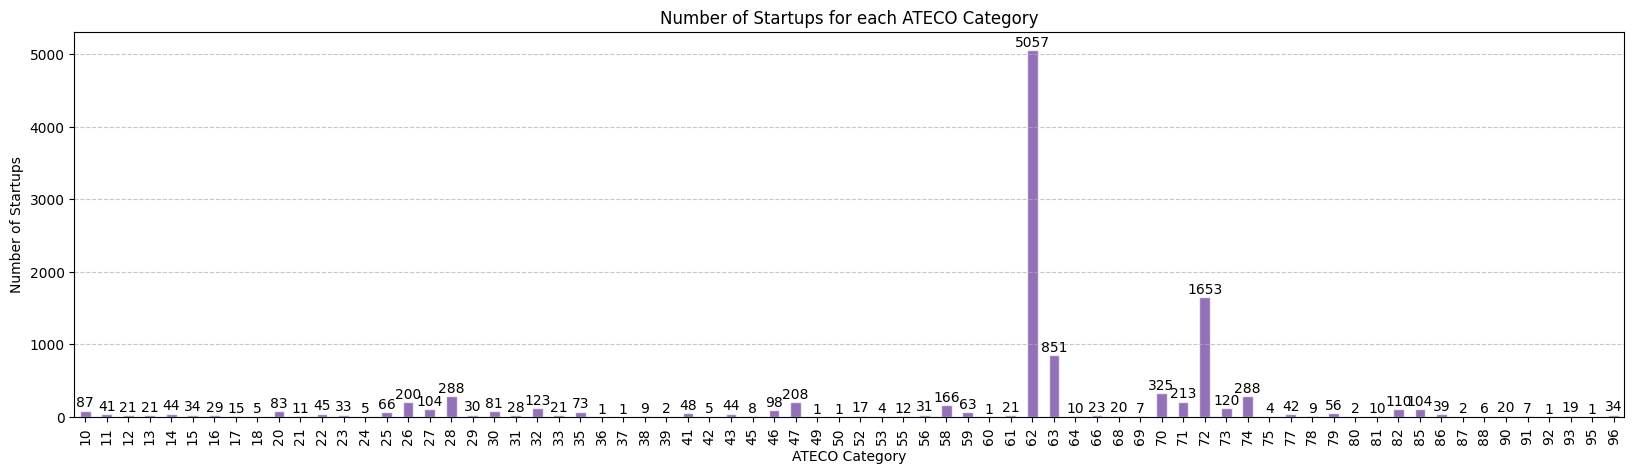

In [25]:
# Create an histogram with the number of startups for each ATECO category
ateco_counts = df_s_anagrafica_post2019[f"ATECO_{n}"].value_counts().sort_index()
plt.figure(figsize=(20, 5))
ateco_counts.plot(kind='bar', color="rebeccapurple", edgecolor="white", alpha=0.7)
for i in range(len(ateco_counts)):
    plt.text(i, ateco_counts.iloc[i] + 10, str(ateco_counts.iloc[i]), ha='center', va='bottom')
plt.xlabel("ATECO Category")
plt.ylabel("Number of Startups")
plt.title("Number of Startups for each ATECO Category")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [29]:
# Load the file with the meaning of ATECO codes
df_significato_codici_ateco = download_from_drive("csv_significato_codici_ateco")

# Convert the ATECO_2 column in ateco_counts to string
ateco_counts.index = ateco_counts.index.astype(str)

# Convert the Codice ATECO column in df_significato_codici_ateco to string
df_significato_codici_ateco["Codice ATECO"] = df_significato_codici_ateco["Codice ATECO"].astype(str)

# Merge the ATECO counts with their meanings
df_ateco_analysis = pd.DataFrame(ateco_counts).reset_index()
df_ateco_analysis.columns = ["ATECO_2", "Numero di Startup"]
df_ateco_analysis = df_ateco_analysis.merge(df_significato_codici_ateco, left_on="ATECO_2", right_on="Codice ATECO")

# Sort by the number of startups
df_ateco_analysis = df_ateco_analysis.sort_values(by="Numero di Startup", ascending=False)

# Display the analysis
df_ateco_analysis[["ATECO_2", "Numero di Startup", "Settore di attività"]]
# Focus on top 10 ATECO categories
df_ateco_analysis_top10 = df_ateco_analysis.head(20)
df_ateco_analysis_top10[["ATECO_2", "Numero di Startup", "Settore di attività"]]

,ATECO_2,Numero di Startup,Settore di attività
44,62,5057,"Produzione di software, consulenza informatica..."
52,72,1653,Ricerca scientifica e sviluppo
45,63,851,Attività dei servizi d'informazione
50,70,325,Attività di direzione aziendale e di consulenz...
54,74,288,"Altre attività professionali, scientifiche e t..."
17,28,288,Fabbricazione di macchinari e attrezzature
51,71,213,Attività degli studi di architettura e ingegneria
33,47,208,Commercio al dettaglio (escluso autoveicoli e ...
15,26,200,"Fabbricazione di computer, prodotti di elettro..."
40,58,166,Attività editoriali


## Distribuzione per Forma Giuridica

/tmp/ipykernel_5980/2738304549.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, forma_giuridica_counts[i] + 10, str(forma_giuridica_counts[i]), ha='center', va='bottom')


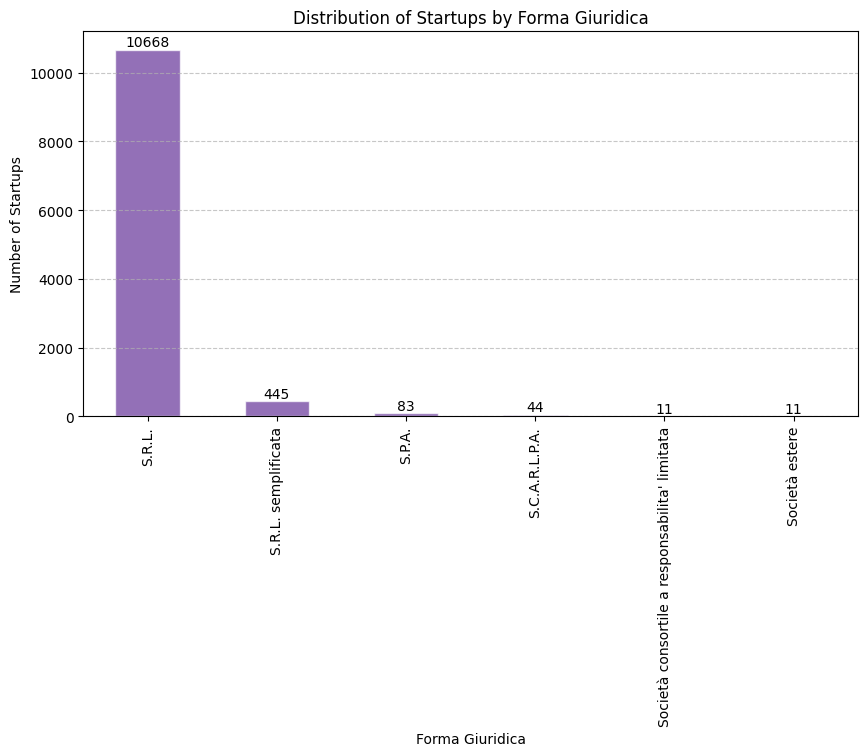

In [27]:
# Distribution of startup grouped by Forma Giuridica
forma_giuridica_counts = df_s_anagrafica_post2019["Forma giuridica"].value_counts() # Count the number of startups for each Forma Giuridica

# Plot the distribution
plt.figure(figsize=(10, 5))
forma_giuridica_counts.plot(kind='bar', color="rebeccapurple", edgecolor="white", alpha=0.7)
for i in range(len(forma_giuridica_counts)):
    plt.text(i, forma_giuridica_counts[i] + 10, str(forma_giuridica_counts[i]), ha='center', va='bottom')
plt.xlabel("Forma Giuridica")
plt.ylabel("Number of Startups")
plt.title("Distribution of Startups by Forma Giuridica")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
df_s_anagrafica_post2019[df_s_anagrafica_post2019["Stato giuridico"] == "In liquidazione"].v

,Ragione sociale,BvD ID number,Codice fiscale,Numero CCIAA,Partita IVA,Indirizzo sede legale,Provincia,Indirizzo sede legale - Codice postale,Indirizzo sede legale - Regione,Sede operativa,Sede operativa - Provincia,Sede operativa - Codice postale,Sede operativa - Regione - Regione,ATECO,Anno di costituzione,Stato giuridico,Forma giuridica,ATECO_2
Index,,,,,,,,,,,,,,,,,,
84,NGV POWERTRAIN S.R.L. IN LIQUIDAZIONE,IT02873150359,2873150359,RE0320912,2873150359,"VIA AMUNDSEN ROALD, 1",Reggio nell'Emilia,42122,Emilia-Romagna,VIA ROALD AMUNDSEN 1,Reggio nell'Emilia,42122,EMILIA-ROMAGNA,281111,2019,In liquidazione,S.R.L.,28
106,PASCOL S.R.L.,IT01030580144,1030580144,SO0077515,1030580144,"VIA AL PORTO, 2",Sondrio,23010,Lombardia,VIA AL PORTO 2,Sondrio,23010,LOMBARDIA,463210,2019,In liquidazione,S.R.L.,46
298,RIPIENE S.R.L.,IT11570740966,11570740966,MI2611899,11570740966,"VIA LUIGI CANONICA, 59",Milano,20154,Lombardia,VIA LUIGI CANONICA 59,Milano,20154,LOMBARDIA,620100,2021,In liquidazione,S.R.L.,62
360,MILANO ELETTRICA S.R.L. IN LIQUIDAZIONE,IT11555240966,11555240966,MI2610705,11555240966,"CSO SAN GOTTARDO, 9",Milano,20136,Lombardia,NaN,Milano,20136,Lombardia,620100,2021,In liquidazione,S.R.L.,62
623,"DUO SYSTEM SRL, IN LIQUIDAZIONE",IT03067430649,3067430649,AV0202743,3067430649,"CSO UMBERTO I, 284",Avellino,83100,Campania,NaN,Avellino,83100,Campania,439909,2020,In liquidazione,S.R.L.,43


## Distribuzione startup fallite

In [37]:
# import csv_startup_fallite 
df_s_fallite = download_from_drive("csv_startup_fallite")

In [46]:
df_s_fallite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12026 entries, 0 to 12025
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               11967 non-null  float64
 1   Ragione sociale                          11967 non-null  object 
 2   Stato giuridico                          11967 non-null  object 
 3   Data di chiusura ultimo bilancio         9328 non-null   object 
 4   Procedura/Cessazione                     629 non-null    object 
 5   Procedure contro impresa
Tipo procedura  0 non-null      float64
 6   Procedure contro soci
Tipo procedura     0 non-null      float64
 7   Procedure concorsuali rilevati           0 non-null      float64
 8   Ultima data di monitoraggio              0 non-null      float64
 9   Profilo
Dati costitutivi
data termine    0 non-null      float64
 10  Profilo
altre informazioni               0 non

In [45]:
df_s_fallite["Procedura/Cessazione"].value_counts().sum()

np.int64(629)

# Dati Finanziari (delirio)

In [47]:
df_s_dati_finanziari = download_from_drive("csv_startup_dati_finanziari")

In [ ]:
# Column list
list(df_s_dati_finanziari.columns)

['Unnamed: 0',
 'Ragione_sociale',
 'TOT._VAL._DELLA_PRODUZIONE\nmigl_EUR\nUltimo_anno_disp.',
 'TOT._VAL._DELLA_PRODUZIONE\nmigl_EUR\nAnno_-_1',
 'TOT._VAL._DELLA_PRODUZIONE\nmigl_EUR\nAnno_-_2',
 'TOT._VAL._DELLA_PRODUZIONE\nmigl_EUR\nAnno_-_3',
 'TOT._VAL._DELLA_PRODUZIONE\nmigl_EUR\nAnno_-_4',
 'TOT._VAL._DELLA_PRODUZIONE\nmigl_EUR\nAnno_-_5',
 'TOT._VAL._DELLA_PRODUZIONE\nmigl_EUR\nAnno_-_6',
 'TOT._VAL._DELLA_PRODUZIONE\nmigl_EUR\nAnno_-_7',
 'TOT._VAL._DELLA_PRODUZIONE\nmigl_EUR\nAnno_-_8',
 'TOT._VAL._DELLA_PRODUZIONE\nmigl_EUR\nAnno_-_9',
 'Ricavi_vendite_e_prestazioni\nmigl_EUR\nUltimo_anno_disp.',
 'Ricavi_vendite_e_prestazioni\nmigl_EUR\nAnno_-_1',
 'Ricavi_vendite_e_prestazioni\nmigl_EUR\nAnno_-_2',
 'Ricavi_vendite_e_prestazioni\nmigl_EUR\nAnno_-_3',
 'Ricavi_vendite_e_prestazioni\nmigl_EUR\nAnno_-_4',
 'Ricavi_vendite_e_prestazioni\nmigl_EUR\nAnno_-_5',
 'Ricavi_vendite_e_prestazioni\nmigl_EUR\nAnno_-_6',
 'Ricavi_vendite_e_prestazioni\nmigl_EUR\nAnno_-_7',
 'Ricavi_vend

In [ ]:
# Sposta ultime due colonne all'inizio

# Check valori nulli?? Da capire bene